### Muhammad Muzammil
###### m.muzammil8691@gmail.com

#### Monday Assignment 

### **Problem 01: “Advanced Pandas Data Manipulation with Kaggle Housing Dataset”**

In [1]:
import pandas as pd

a. Load the Kaggle housing dataset


In [3]:
df = pd.read_csv('housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


b. Filter houses priced above the median, with more than 2 bedrooms and 2000 sqft living area


In [6]:
median_price = df['price'].median()
filtered_df = df[(df['price'] > median_price) & 
                 (df['bedrooms'] > 2) & 
                 (df['area'] > 2000)]
median_price, filtered_df

(np.float64(4340000.0),
         price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
 0    13300000  7420         4          2        3      yes        no       no   
 1    12250000  8960         4          4        4      yes        no       no   
 2    12250000  9960         3          2        2      yes        no      yes   
 3    12215000  7500         4          2        2      yes        no      yes   
 4    11410000  7420         4          1        2      yes       yes      yes   
 ..        ...   ...       ...        ...      ...      ...       ...      ...   
 265   4403000  2880         3          1        2      yes        no       no   
 266   4403000  4880         3          1        1      yes        no       no   
 267   4403000  4920         3          1        2      yes        no       no   
 268   4382000  4950         4          1        2      yes        no       no   
 269   4375000  3900         3          1        2      yes        no     

c. Group by bedrooms and calculate the average price and median living area


In [8]:
grouped_df = filtered_df.groupby('bedrooms').agg({
    'price': 'mean',
    'area': 'median'
}).reset_index()
grouped_df

,bedrooms,price,area
0,3,6.084991e+06,6000.0
1,4,6.776328e+06,6000.0
2,5,7.379167e+06,7395.0
3,6,6.083000e+06,4300.0


d. Sort by price and rank the top 5% most expensive houses


In [12]:
sorted_df = df.sort_values(by='price', ascending=False)
top_5_percent_index = int(0.05 * len(df))
top_5_percent_houses = sorted_df.head(top_5_percent_index)

print(f" Sorted \n{sorted_df}") 

print(f" Top 5 Percent index \n{top_5_percent_index}")

print(f" Top 5 Percent houses \n{top_5_percent_houses}")


 Sorted 
        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
1    12250000  8960         4          4        4      yes        no       no   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
543   1750000  2910         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hotwaterheatin

e. Calculate correlations between price, living area, and bedrooms


In [14]:
correlations = df[['price', 'area', 'bedrooms']].corr()
correlations

,price,area,bedrooms
price,1.000000,0.535997,0.366494
area,0.535997,1.000000,0.151858
bedrooms,0.366494,0.151858,1.000000


f. Generate descriptive statistics for price, bedrooms, living area, and lot size


In [17]:
descriptive_stats = df[['price', 'bedrooms', 'area', 'parking']].describe()
descriptive_stats

,price,bedrooms,area,parking
count,5.450000e+02,545.000000,545.000000,545.000000
mean,4.766729e+06,2.965138,5150.541284,0.693578
std,1.870440e+06,0.738064,2170.141023,0.861586
min,1.750000e+06,1.000000,1650.000000,0.000000
25%,3.430000e+06,2.000000,3600.000000,0.000000
50%,4.340000e+06,3.000000,4600.000000,0.000000
75%,5.740000e+06,3.000000,6360.000000,1.000000
max,1.330000e+07,6.000000,16200.000000,3.000000


g. Create a price_per_sqft column and classify houses as "Low," "Medium," or "High"


In [21]:
df['price_per_sqft'] = df['price'] / df['area']
price_per_sqft_bins = [0, df['price_per_sqft'].quantile(0.33), df['price_per_sqft'].quantile(0.66), df['price_per_sqft'].max()]
price_labels = ['Low', 'Medium', 'High']
df['price_class'] = pd.cut(df['price_per_sqft'], bins=price_per_sqft_bins, labels=price_labels)

print(f"Price PSFB {price_per_sqft_bins}")
print(f"Price Labels {price_labels}")

Price PSFB [0, np.float64(822.9364151323167), np.float64(1096.9933333333336), np.float64(2640.0)]
Price Labels ['Low', 'Medium', 'High']


h. Handle missing values in bathrooms and lot size, and fill missing prices with the mean


In [26]:
df.loc[:, 'bathrooms'] = df['bathrooms'].fillna(df['bathrooms'].median())
df.loc[:, 'parking'] = df['parking'].fillna(df['parking'].median())
df.loc[:, 'price'] = df['price'].fillna(df['price'].mean())


In [27]:
df = df.copy()

# Now apply the fillna operations
df['bathrooms'] = df['bathrooms'].fillna(df['bathrooms'].median())
df['parking'] = df['parking'].fillna(df['parking'].median())
df['price'] = df['price'].fillna(df['price'].mean())


### Problem 02: “Student Performance Analysis” 


a. Create a DataFrame with synthetic data for students' grades, attendance, and extracurricular 
activities; filter for students with an average grade above 85% and at least 90% attendance, as well 
as those participating in extracurricular activities despite having failing grades in any subject. 

In [28]:
import pandas as pd
import numpy as np

# Create synthetic data for students
data = {
    'student_id': range(1, 21),
    'grade': np.random.randint(50, 100, size=20),  # Grades between 50 and 100
    'attendance': np.random.randint(80, 100, size=20),  # Attendance percentage between 80 and 100
    'extracurricular_activity': np.random.choice(['Sports', 'Music', 'Drama', 'None'], size=20)
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Filter students with average grade > 85% and attendance >= 90%
filtered_students = df[(df['grade'] > 85) & (df['attendance'] >= 90)]

# Filter students who participate in extracurricular activities and have failing grades (<60)
failing_students_with_activities = df[(df['grade'] < 60) & (df['extracurricular_activity'] != 'None')]

# Display both filtered sets
print("Students with average grade > 85% and attendance >= 90%:")
print(filtered_students)
print("\nStudents with extracurricular activities and failing grades:")
print(failing_students_with_activities)


Students with average grade > 85% and attendance >= 90%:
    student_id  grade  attendance extracurricular_activity
1            2     87          98                    Music
3            4     97          98                   Sports
4            5     87          98                   Sports
5            6     93          98                   Sports
8            9     88          98                     None
19          20     96          92                   Sports

Students with extracurricular activities and failing grades:
    student_id  grade  attendance extracurricular_activity
14          15     53          92                    Music


b. Group the DataFrame by extracurricular_activity to calculate average grades and total attendance 
for each activity, then identify which activity has the highest average grade. 

In [29]:
# Group by extracurricular activity and calculate average grades and total attendance
grouped = df.groupby('extracurricular_activity').agg(
    avg_grade=('grade', 'mean'),
    total_attendance=('attendance', 'sum')
).reset_index()

# Identify the activity with the highest average grade
highest_avg_grade_activity = grouped.loc[grouped['avg_grade'].idxmax()]

print("\nGrouped Data:")
print(grouped)
print("\nActivity with the highest average grade:")
print(highest_avg_grade_activity)



Grouped Data:
  extracurricular_activity  avg_grade  total_attendance
0                    Drama  60.000000                89
1                    Music  73.666667               530
2                     None  78.500000               383
3                   Sports  84.111111               819

Activity with the highest average grade:
extracurricular_activity       Sports
avg_grade                   84.111111
total_attendance                  819
Name: 3, dtype: object


c. Sort the DataFrame by grades and create a pass_fail column using a lambda function to indicate 
passing or failing status, then count the total number of passes and fails. 

In [30]:
# Sort by grades
df_sorted = df.sort_values(by='grade', ascending=False)

# Create pass/fail column
df_sorted['pass_fail'] = df_sorted['grade'].apply(lambda x: 'Pass' if x >= 60 else 'Fail')

# Count the number of passes and fails
pass_fail_count = df_sorted['pass_fail'].value_counts()

print("\nSorted DataFrame with Pass/Fail Status:")
print(df_sorted)
print("\nPass/Fail Count:")
print(pass_fail_count)



Sorted DataFrame with Pass/Fail Status:
    student_id  grade  attendance extracurricular_activity pass_fail
3            4     97          98                   Sports      Pass
19          20     96          92                   Sports      Pass
5            6     93          98                   Sports      Pass
17          18     92          89                     None      Pass
6            7     89          80                    Music      Pass
8            9     88          98                     None      Pass
1            2     87          98                    Music      Pass
4            5     87          98                   Sports      Pass
15          16     83          89                   Sports      Pass
10          11     82          99                     None      Pass
18          19     82          91                   Sports      Pass
16          17     80          91                   Sports      Pass
12          13     75          82                    Music    

d. Create a second DataFrame containing parent income levels and merge it with the first DataFrame; 
analyze how these income levels impact the average grades of students

In [31]:
# Create synthetic data for parent income levels
parent_income_data = {
    'student_id': range(1, 21),
    'parent_income': np.random.randint(20000, 100000, size=20)  # Income in some range
}

# Convert to DataFrame
income_df = pd.DataFrame(parent_income_data)

# Merge with the original DataFrame
merged_df = pd.merge(df, income_df, on='student_id')

# Analyze how income impacts grades
income_impact = merged_df.groupby('parent_income').agg(
    avg_grade=('grade', 'mean')
).reset_index()

print("\nMerged DataFrame with Parent Income Levels:")
print(merged_df)
print("\nImpact of Parent Income on Average Grades:")
print(income_impact)



Merged DataFrame with Parent Income Levels:
    student_id  grade  attendance extracurricular_activity  parent_income
0            1     73          80                   Sports          91838
1            2     87          98                    Music          70322
2            3     60          89                    Drama          26884
3            4     97          98                   Sports          95354
4            5     87          98                   Sports          68547
5            6     93          98                   Sports          49642
6            7     89          80                    Music          74979
7            8     52          97                     None          78390
8            9     88          98                     None          60444
9           10     68          95                    Music          55951
10          11     82          99                     None          45348
11          12     70          83                    Music         

e. Segment students into quartiles based on their grades, then analyze and discuss the correlations 
between attendance and grades within each quartile to identify any patterns or trends.

In [35]:
# Segment students into quartiles based on their grades
df['grade_quartile'] = pd.qcut(df['grade'], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

# Analyze the correlation between attendance and grades within each quartile
correlation_within_quartiles = df.groupby('grade_quartile', observed=False).apply(
    lambda group: group.drop(columns=['grade_quartile'])  # Adjust as needed
)

print("\nCorrelation between attendance and grades within each quartile:")
print(correlation_within_quartiles)



Correlation between attendance and grades within each quartile:
                   student_id  grade  attendance extracurricular_activity  \
grade_quartile                                                              
Q1             2            3     60          89                    Drama   
               7            8     52          97                     None   
               9           10     68          95                    Music   
               13          14     66          82                   Sports   
               14          15     53          92                    Music   
Q2             0            1     73          80                   Sports   
               10          11     82          99                     None   
               11          12     70          83                    Music   
               12          13     75          82                    Music   
               16          17     80          91                   Sports   
           

C:\Users\PMYLS\AppData\Local\Temp\ipykernel_8704\2365405523.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlation_within_quartiles = df.groupby('grade_quartile', observed=False).apply(


f. Create a performance_score that combines grades, attendance, and extracurricular participation, 
then justify the chosen weightings based on their perceived impact on overall student performance, 
considering factors such as the importance of academic achievement, consistent attendance, and 
involvement in activities for holistic development. 

In [36]:
# Define weightings for the performance score (for example: 50% grades, 30% attendance, 20% extracurricular)
def calculate_performance_score(row):
    grade_weight = 0.5
    attendance_weight = 0.3
    activity_weight = 0.2
    activity_bonus = 1 if row['extracurricular_activity'] != 'None' else 0
    
    score = (row['grade'] * grade_weight) + (row['attendance'] * attendance_weight) + (activity_bonus * 100 * activity_weight)
    return score

df['performance_score'] = df.apply(calculate_performance_score, axis=1)

print("\nDataFrame with Performance Scores:")
print(df[['student_id', 'grade', 'attendance', 'extracurricular_activity', 'performance_score']])



DataFrame with Performance Scores:
    student_id  grade  attendance extracurricular_activity  performance_score
0            1     73          80                   Sports               80.5
1            2     87          98                    Music               92.9
2            3     60          89                    Drama               76.7
3            4     97          98                   Sports               97.9
4            5     87          98                   Sports               92.9
5            6     93          98                   Sports               95.9
6            7     89          80                    Music               88.5
7            8     52          97                     None               55.1
8            9     88          98                     None               73.4
9           10     68          95                    Music               82.5
10          11     82          99                     None               70.7
11          12     70       

### Problem 03: “Movie Ratings and Trends Analysis” 





a. Load a dataset containing movie ratings, genres, release years, and box office earnings. Filter the dataset to include only movies released after 2000 with at least 100 ratings.

In [38]:
import pandas as pd

# Load dataset (replace 'movies.csv' with the actual dataset path)
df = pd.read_csv('movies_dataset.csv')

# Filter to include only movies released after 2000 with at least 100 ratings
filtered_df = df[(df['release_year'] > 2000) & (df['num_ratings'] >= 100)]

filtered_df

,movie_id,title,genre,release_year,rating,num_ratings,box_office_earnings
0,1,Inception,Action,2010,8.8,150000,829895144
1,2,Toy Story 3,Animation,2010,8.2,200000,1068252622
2,3,The Dark Knight,Action,2008,9.0,300000,1004558444
3,4,The Social Network,Drama,2010,7.7,120000,224054848
4,5,Avatar,Sci-Fi,2009,7.8,1000000,2787965087
5,6,The Avengers,Action,2012,8.0,500000,1518812988
6,7,The King's Speech,Drama,2010,8.0,70000,41421154
7,8,Jurassic World,Sci-Fi,2015,7.0,500000,1671713208
8,9,Deadpool,Action,2016,8.0,450000,783112979
9,10,Black Panther,Action,2018,7.3,800000,1346913161


b. Create a new column to classify movies as "Blockbuster" (box office earnings above $100 million) or "Flop." Group the data by genre to calculate the average rating and total earnings for each genre.

In [39]:
# Create a new column 'movie_status' for classification
df['movie_status'] = df['box_office_earnings'].apply(lambda x: 'Blockbuster' if x > 100_000_000 else 'Flop')

# Group by genre to calculate the average rating and total earnings for each genre
genre_grouped = filtered_df.groupby('genre').agg(
    average_rating=('rating', 'mean'),
    total_earnings=('box_office_earnings', 'sum')
).reset_index()

print(genre_grouped)


       genre  average_rating  total_earnings
0     Action            8.22      5483292716
1  Animation            8.20      1068252622
2      Drama            7.85       265476002
3     Sci-Fi            7.40      4459678295


c. Calculate the average movie rating over the years and visualize the trend using a line plot. Discuss any observable patterns.


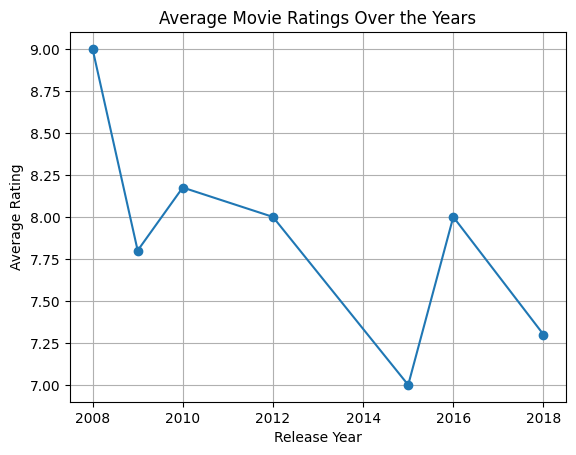

In [40]:
import matplotlib.pyplot as plt

# Group by release year to calculate average movie rating per year
rating_trend = filtered_df.groupby('release_year')['rating'].mean().reset_index()

# Plot the rating trend
plt.plot(rating_trend['release_year'], rating_trend['rating'], marker='o')
plt.title('Average Movie Ratings Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()


d. Analyze the correlation between ratings and box office earnings, and discuss possible reasons for the correlation.


In [41]:
# Calculate the correlation between ratings and box office earnings
correlation = filtered_df['rating'].corr(filtered_df['box_office_earnings'])

print(f"Correlation between ratings and box office earnings: {correlation:.2f}")


Correlation between ratings and box office earnings: -0.27


### Problem 04: “Data Detective” 


In [48]:
# Sample DataFrame for suspects
suspects_data = {
    'suspect_id': [1, 2, 3, 4, 5],
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'suspicion_level': [4, 2, 5, 1, 3]
}

suspects_df = pd.DataFrame(suspects_data)

# Sample DataFrame for evidence
evidence_data = {
    'evidence_id': [101, 102, 103, 104],
    'suspect_id': [1, 2, 1, 3]  # Connecting evidence to suspects
}

evidence_df = pd.DataFrame(evidence_data)

print(f"Suspect Data \n{suspects_df}")
print("____________________________________")
print(f"Evidence Data \n{evidence_df}")


Suspect Data 
   suspect_id     name  suspicion_level
0           1    Alice                4
1           2      Bob                2
2           3  Charlie                5
3           4    David                1
4           5      Eve                3
____________________________________
Evidence Data 
   evidence_id  suspect_id
0          101           1
1          102           2
2          103           1
3          104           3


a. Identify suspects with a suspicion level above 3


In [49]:
suspects_above_threshold = suspects_df[suspects_df['suspicion_level'] > 3]
print("Suspects with suspicion level above 3:")
print(suspects_above_threshold)

Suspects with suspicion level above 3:
   suspect_id     name  suspicion_level
0           1    Alice                4
2           3  Charlie                5


 b. Merge the suspects and evidence DataFrames to discover connections


In [50]:
merged_df = pd.merge(suspects_df, evidence_df, on='suspect_id', how='left')
print("\nMerged DataFrame of suspects and evidence:")
print(merged_df)


Merged DataFrame of suspects and evidence:
   suspect_id     name  suspicion_level  evidence_id
0           1    Alice                4        101.0
1           1    Alice                4        103.0
2           2      Bob                2        102.0
3           3  Charlie                5        104.0
4           4    David                1          NaN
5           5      Eve                3          NaN


c. Group suspects by suspicion level and count the number of suspects in each group


In [51]:
grouped_suspects_count = suspects_df.groupby('suspicion_level').size().reset_index(name='count')
print("\nCount of suspects by suspicion level:")
print(grouped_suspects_count)


Count of suspects by suspicion level:
   suspicion_level  count
0                1      1
1                2      1
2                3      1
3                4      1
4                5      1


d. Calculate the average suspicion level among suspects


In [52]:
average_suspicion_level = suspects_df['suspicion_level'].mean()
print("\nAverage suspicion level among suspects:")
print(average_suspicion_level)


Average suspicion level among suspects:
3.0


### Problem 05: “Advanced Data Analysis with Pandas” 


In [54]:
# Sample data creation
data = {
    'transaction_id': range(1, 11),
    'date': pd.date_range(start='2024-01-01', periods=10, freq='D'),
    'category': ['Electronics', 'Clothing', 'Electronics', 'Groceries', 'Clothing', 
                 'Electronics', 'Groceries', 'Clothing', 'Electronics', 'Groceries'],
    'amount': [200, 150, 300, 100, 200, 250, 50, 80, 400, 120],
    'customer_id': [1, 2, 1, 3, 2, 1, 3, 2, 1, 3]
}

df = pd.DataFrame(data)
df

,transaction_id,date,category,amount,customer_id
0,1,2024-01-01,Electronics,200,1
1,2,2024-01-02,Clothing,150,2
2,3,2024-01-03,Electronics,300,1
3,4,2024-01-04,Groceries,100,3
4,5,2024-01-05,Clothing,200,2
5,6,2024-01-06,Electronics,250,1
6,7,2024-01-07,Groceries,50,3
7,8,2024-01-08,Clothing,80,2
8,9,2024-01-09,Electronics,400,1
9,10,2024-01-10,Groceries,120,3


 Step 2: GroupBy Function


In [55]:
grouped = df.groupby('category').agg({'amount': ['mean', 'count', 'sum']}).reset_index()
grouped.columns = ['category', 'mean_amount', 'transaction_count', 'total_amount']
print("Grouped DataFrame:")
print(grouped)

Grouped DataFrame:
      category  mean_amount  transaction_count  total_amount
0     Clothing   143.333333                  3           430
1  Electronics   287.500000                  4          1150
2    Groceries    90.000000                  3           270


Step 3: Pivot Table Creation


In [56]:
pivot_table = pd.pivot_table(df, values='amount', index='date', columns='category', aggfunc='sum', fill_value=0)
print("\nPivot Table:")
print(pivot_table)


Pivot Table:
category    Clothing  Electronics  Groceries
date                                        
2024-01-01         0          200          0
2024-01-02       150            0          0
2024-01-03         0          300          0
2024-01-04         0            0        100
2024-01-05       200            0          0
2024-01-06         0          250          0
2024-01-07         0            0         50
2024-01-08        80            0          0
2024-01-09         0          400          0
2024-01-10         0            0        120


Step 4: Merging with Another Dataset


In [57]:
customer_data = {
    'customer_id': [1, 2, 3],
    'customer_name': ['Alice', 'Bob', 'Charlie'],
    'loyalty_level': ['Gold', 'Silver', 'Gold']
}
customer_df = pd.DataFrame(customer_data)

# Merging datasets
merged_df = pd.merge(df, customer_df, on='customer_id', how='left')
print("\nMerged DataFrame:")
print(merged_df)


Merged DataFrame:
   transaction_id       date     category  amount  customer_id customer_name  \
0               1 2024-01-01  Electronics     200            1         Alice   
1               2 2024-01-02     Clothing     150            2           Bob   
2               3 2024-01-03  Electronics     300            1         Alice   
3               4 2024-01-04    Groceries     100            3       Charlie   
4               5 2024-01-05     Clothing     200            2           Bob   
5               6 2024-01-06  Electronics     250            1         Alice   
6               7 2024-01-07    Groceries      50            3       Charlie   
7               8 2024-01-08     Clothing      80            2           Bob   
8               9 2024-01-09  Electronics     400            1         Alice   
9              10 2024-01-10    Groceries     120            3       Charlie   

  loyalty_level  
0          Gold  
1        Silver  
2          Gold  
3          Gold  
4        S

Step 5: Time Series Analysis


In [58]:
monthly_sales = df.resample('M', on='date').sum().reset_index()
print("\nMonthly Sales Data:")
print(monthly_sales)


Monthly Sales Data:
        date  transaction_id  \
0 2024-01-31              55   

                                            category  amount  customer_id  
0  ElectronicsClothingElectronicsGroceriesClothin...    1850           19  


C:\Users\PMYLS\AppData\Local\Temp\ipykernel_8704\293742763.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M', on='date').sum().reset_index()


Step 6: Using the apply() Function


In [59]:
def categorize_transaction(amount):
    if amount < 100:
        return 'Low'
    elif 100 <= amount < 300:
        return 'Medium'
    else:
        return 'High'

merged_df['transaction_category'] = merged_df['amount'].apply(categorize_transaction)
print("\nDataFrame with New Transaction Category Column:")
print(merged_df)


DataFrame with New Transaction Category Column:
   transaction_id       date     category  amount  customer_id customer_name  \
0               1 2024-01-01  Electronics     200            1         Alice   
1               2 2024-01-02     Clothing     150            2           Bob   
2               3 2024-01-03  Electronics     300            1         Alice   
3               4 2024-01-04    Groceries     100            3       Charlie   
4               5 2024-01-05     Clothing     200            2           Bob   
5               6 2024-01-06  Electronics     250            1         Alice   
6               7 2024-01-07    Groceries      50            3       Charlie   
7               8 2024-01-08     Clothing      80            2           Bob   
8               9 2024-01-09  Electronics     400            1         Alice   
9              10 2024-01-10    Groceries     120            3       Charlie   

  loyalty_level transaction_category  
0          Gold               M

Step 7: Summarizing Findings


In [60]:
summary = {
    'Total Transactions': df['transaction_id'].count(),
    'Total Revenue': df['amount'].sum(),
    'Unique Customers': df['customer_id'].nunique(),
    'Average Transaction Amount': df['amount'].mean()
}

print("\nSummary of Findings:")
for key, value in summary.items():
    print(f"{key}: {value}")


Summary of Findings:
Total Transactions: 10
Total Revenue: 1850
Unique Customers: 3
Average Transaction Amount: 185.0


_______________________
The End of Monday Assignment
_____________________